# EDB: IPC2581 export

This example shows how you can use PyAEDT to export an IPC2581 file.

Perform required imports, which includes importing a section.

In [1]:
import os
import tempfile

import pyedb
from pyedb.generic.general_methods import generate_unique_name
from pyedb.misc.downloads import download_file

## Download the AEDB file and copy it in the temporary folder.

In [2]:
temp_dir = tempfile.TemporaryDirectory(suffix=".ansys")
targetfile = download_file("edb/ANSYS-HSD_V1.aedb", destination=temp_dir.name)
ipc2581_file_name = os.path.join(temp_dir.name, "Ansys_Hsd.xml")
print(targetfile)

C:\Users\ansys\AppData\Local\Temp\tmp1zdf__3c.ansys\edb/ANSYS-HSD_V1.aedb


## Launch EDB

Launch the `pyedb.Edb` class, using EDB 2023.
> Note that length dimensions passed to EDB are in SI units.

In [3]:
# Select EDB version (change it manually if needed, e.g. "2025.1")
edb_version = "2025.2"
print(f"EDB version: {edb_version}")

edb = pyedb.Edb(edbpath=targetfile, edbversion=edb_version)

EDB version: 2025.2


C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\pyedb\misc\decorators.py:55: UserWarning: Argument `edbversion` is deprecated for method `Edb`; use `version` instead.
  warnings.warn(
C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\pyedb\generic\design_types.py:301: UserWarning: Your ANSYS AEDT version is eligible to gRPC version.You might consider switching to that version for better user experience.For more information please check this link: https://edb.docs.pyansys.com/version/dev/grpc_api/index.html
  warnings.warn(GRPC_GENERAL_WARNING, UserWarning)


PyEDB INFO: Star initializing Edb 10:22:51.959150


PyEDB INFO: Edb version 2025.2


PyEDB INFO: Logger is initialized. Log file is saved to C:\Users\ansys\AppData\Local\Temp\pyedb_ansys.log.


PyEDB INFO: legacy v0.67.1


PyEDB INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyEDB INFO: Database ANSYS-HSD_V1.aedb Opened in 2025.2


PyEDB INFO: Cell main Opened


PyEDB INFO: Builder was initialized.


PyEDB INFO: open_edb completed in 9.0363 seconds.


PyEDB INFO: EDB initialization completed in 9.1151 seconds.


## Parametrize the width of a trace.

In [4]:
edb.modeler.parametrize_trace_width("A0_N", parameter_name=generate_unique_name("Par"), variable_value="0.4321mm")

True

## Create a cutout and plot it.

PyEDB INFO: -----------------------------------------


PyEDB INFO: Trying cutout with (0.002)*(1000.0)mm expansion size


PyEDB INFO: -----------------------------------------


PyEDB INFO: Cutout Multithread started.


C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\pyedb\misc\decorators.py:55: UserWarning: Argument `signal_list` is deprecated for method `cutout`; use `signal_nets` instead.
  warnings.warn(
C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\pyedb\misc\decorators.py:55: UserWarning: Argument `reference_list` is deprecated for method `cutout`; use `reference_nets` instead.
  warnings.warn(


PyEDB INFO: Net clean up Elapsed time: 0m 1sec


PyEDB INFO: Extent Creation Elapsed time: 0m 0sec


PyEDB INFO: 1822 Padstack Instances deleted. Elapsed time: 0m 1sec


PyEDB INFO: 425 Primitives deleted. Elapsed time: 0m 2sec


PyEDB INFO: 928 components deleted


PyEDB INFO: Deleted 464 components


PyEDB INFO: Single Pins components deleted Elapsed time: 0m 0sec


PyEDB INFO: Cutout completed. Elapsed time: 0m 4sec


PyEDB INFO: EDB file save completed in 0.0690 seconds.


PyEDB INFO: Cutout completed in 1 iterations with expansion size of (0.002)*(1000.0)mm Elapsed time: 0m 4sec


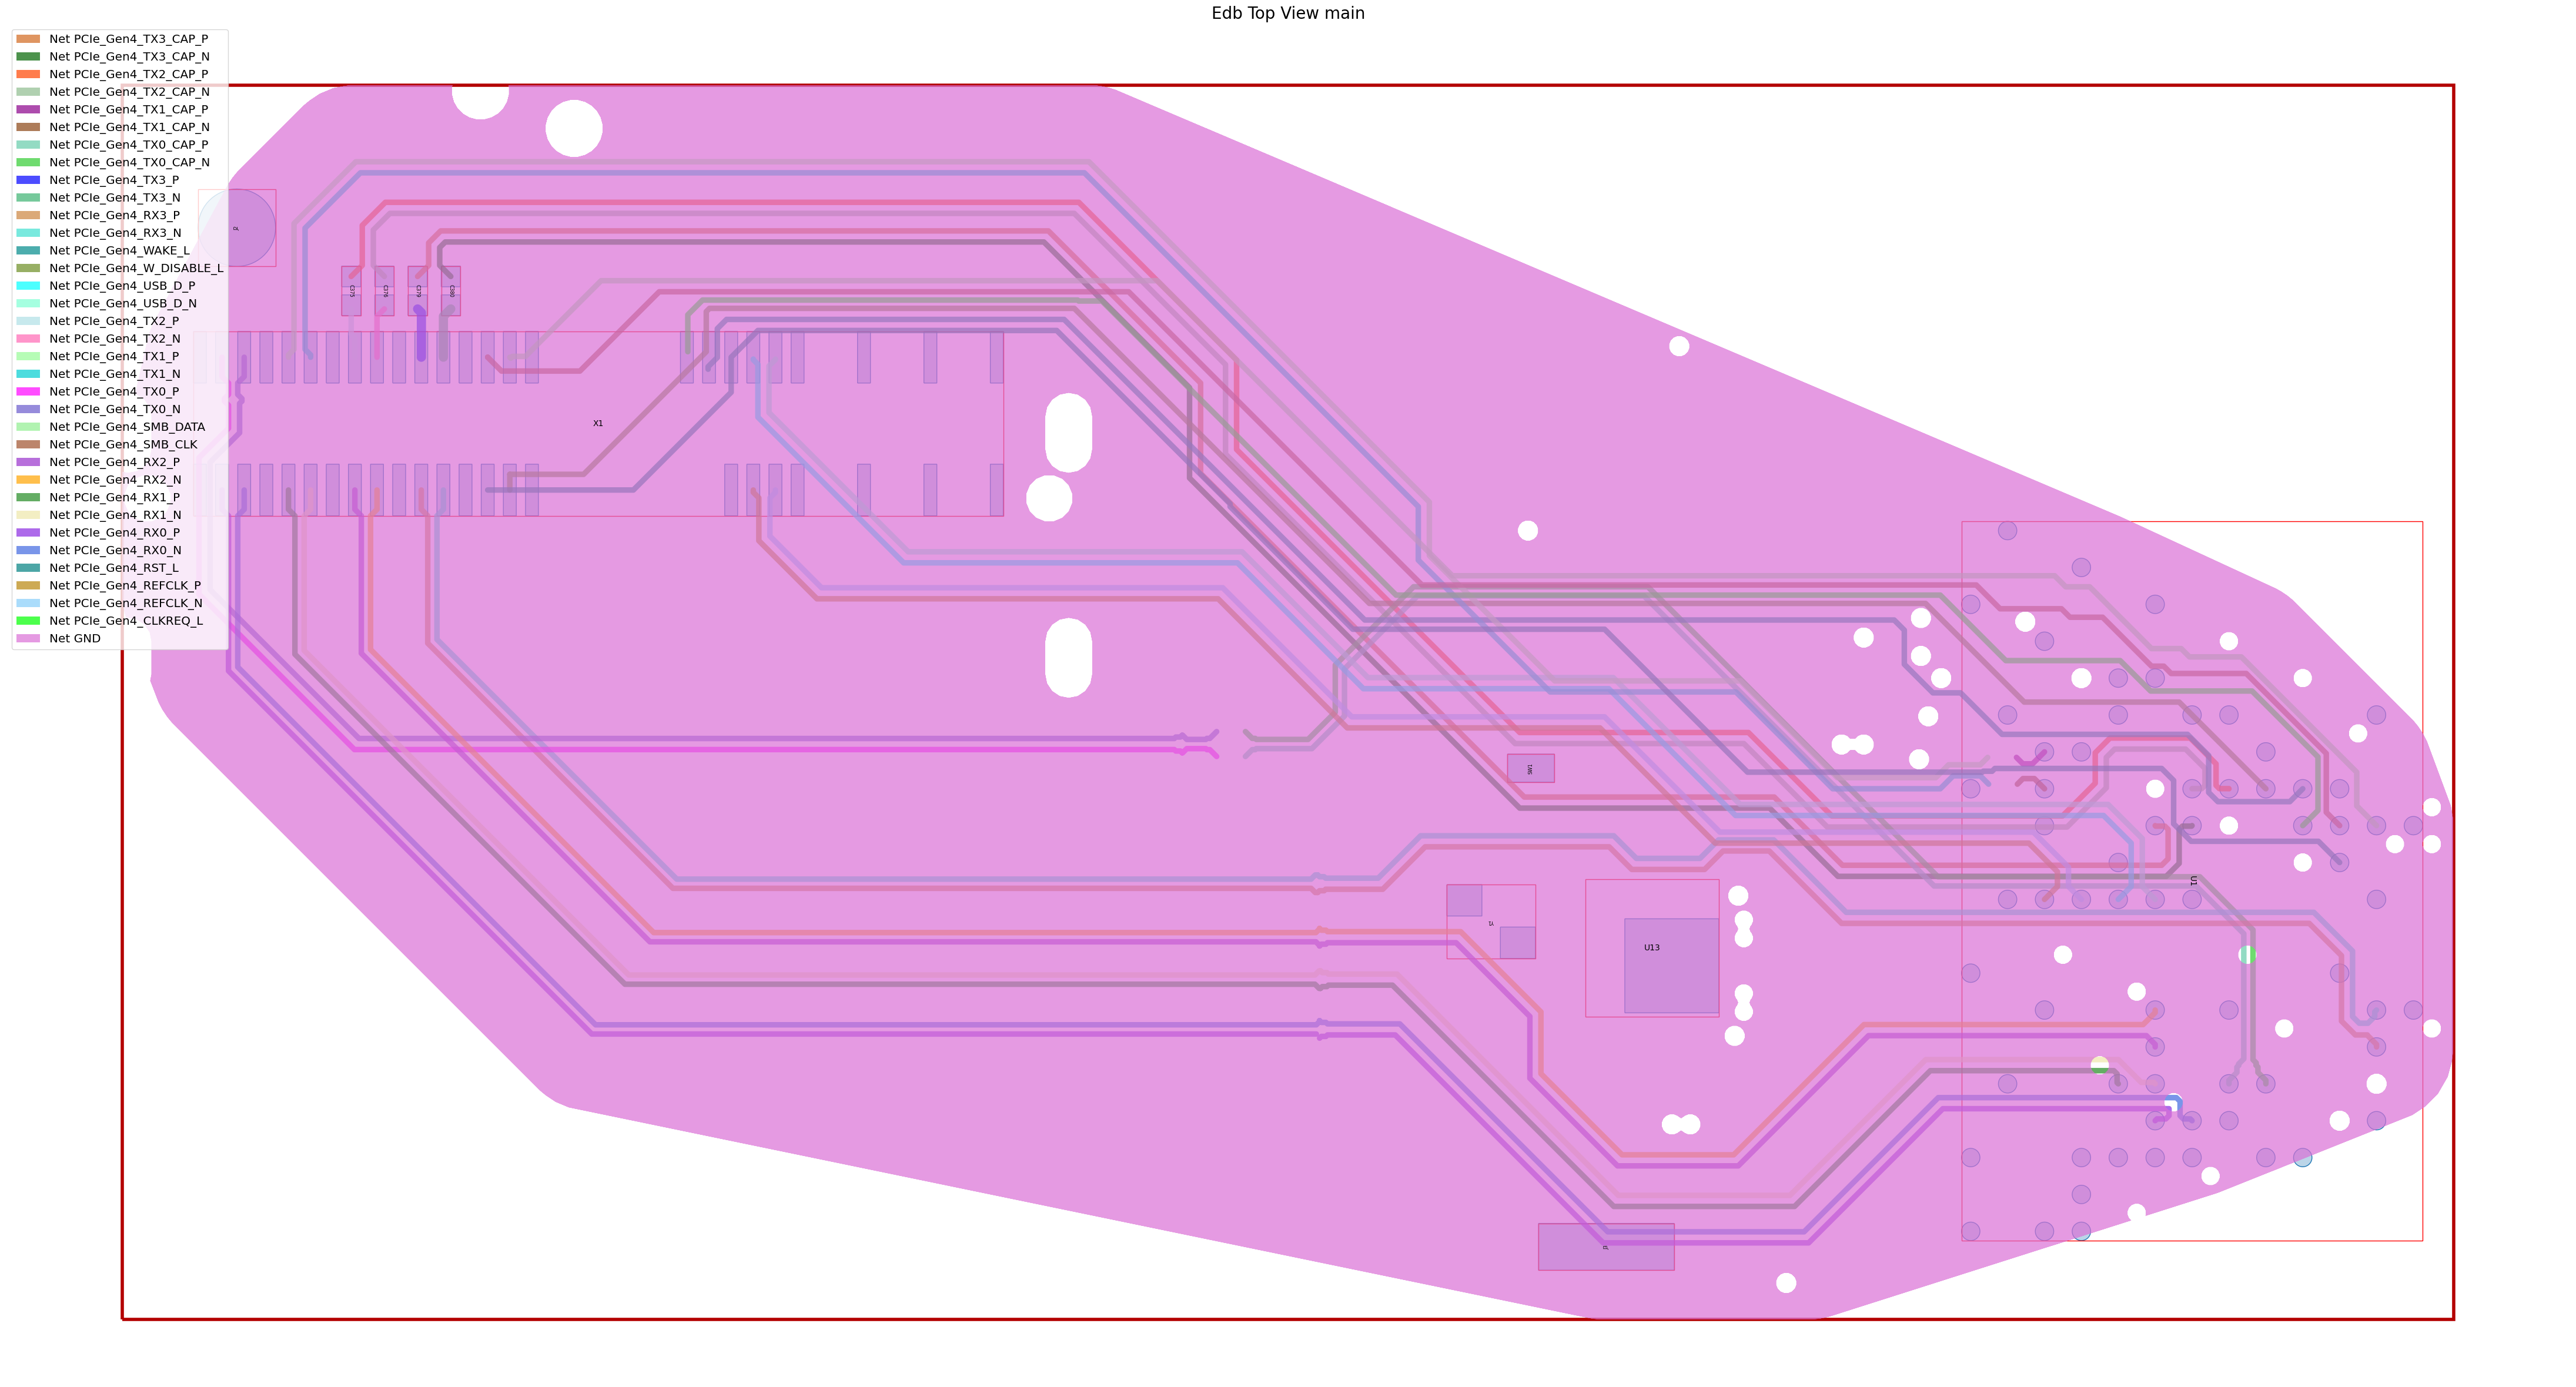

PyEDB INFO: Plot Generation time 1.918


(<Figure size 6000x3000 with 1 Axes>,
 <Axes: title={'center': 'Edb Top View main'}>)

In [5]:
signal_list = []
for net in edb.nets.netlist:
    if "PCIe" in net:
        signal_list.append(net)
power_list = ["GND"]
edb.cutout(
    signal_list=signal_list,
    reference_list=power_list,
    extent_type="ConvexHull",
    expansion_size=0.002,
    use_round_corner=False,
    number_of_threads=4,
    remove_single_pin_components=True,
    use_pyaedt_extent_computing=True,
    extent_defeature=0,
)
edb.nets.plot(None, None, color_by_net=True)

## Export the EDB to an IPC2581 file.

In [6]:
edb.export_to_ipc2581(ipc_path=ipc2581_file_name)
print("IPC2581 File has been saved to {}".format(ipc2581_file_name))

PyEDB INFO: Translation successfully completed.


IPC2581 File has been saved to C:\Users\ansys\AppData\Local\Temp\tmp1zdf__3c.ansys\Ansys_Hsd.xml


## Close EDB

In [7]:
edb.close_edb()

PyEDB INFO: Close Edb file completed in 0.1107 seconds.


True

## Clean up the temporary directory

In [8]:
temp_dir.cleanup()